# Plot TMP

* Plot tempearture variation in multiple dataframe

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

sns.set_style('white')
sns.set_context("poster")

In [2]:
df = pd.read_hdf('data1-zdc.h5', 'table', where='sensor_type in tmp', mode='r', columns=['timestamp', 'sensor_id', 'loc_dir', 'loc_spn', 'value', 'remark'])

In [3]:
df.head()

,timestamp,sensor_id,loc_dir,loc_spn,value,remark
1,2017-07-01,212,SE,MS,12.53911,NaN
3,2017-07-01,211,SE,MS,12.75999,NaN
5,2017-07-01,210,SE,MS,12.72045,NaN
28,2017-07-01,104,NW,MS,12.84082,NaN
38,2017-07-01,112,NW,SS,32.15879,internal


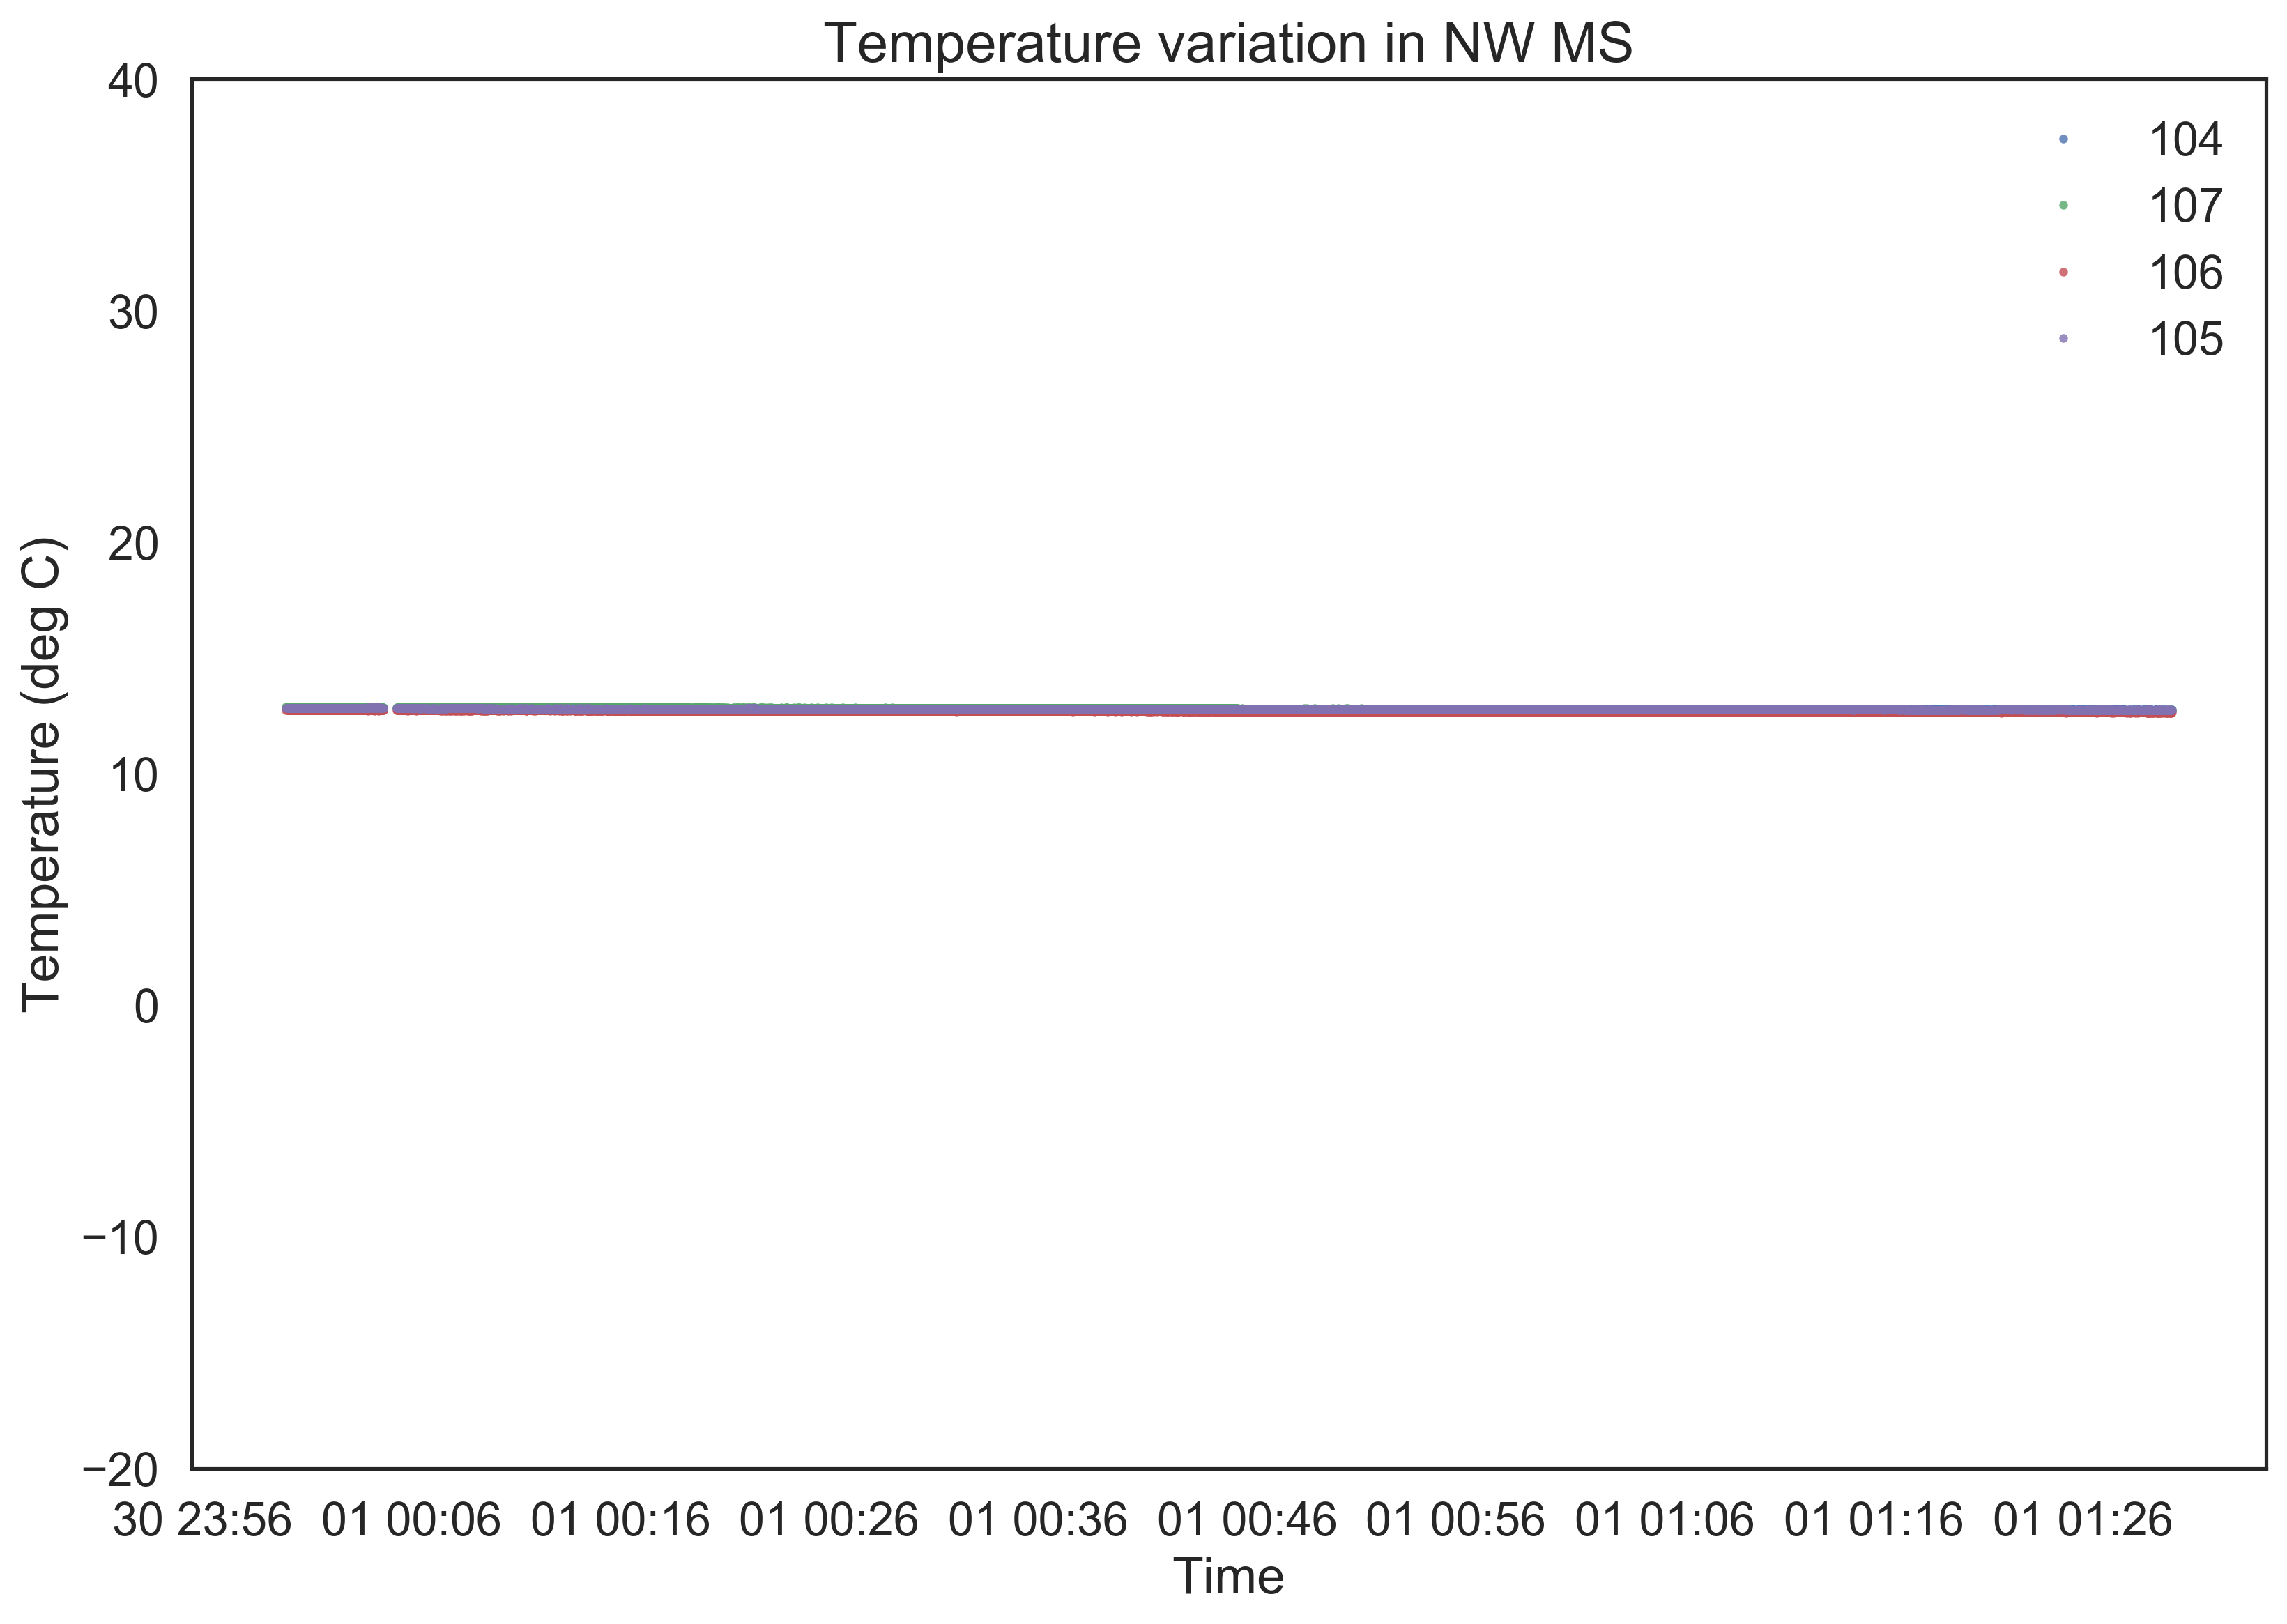

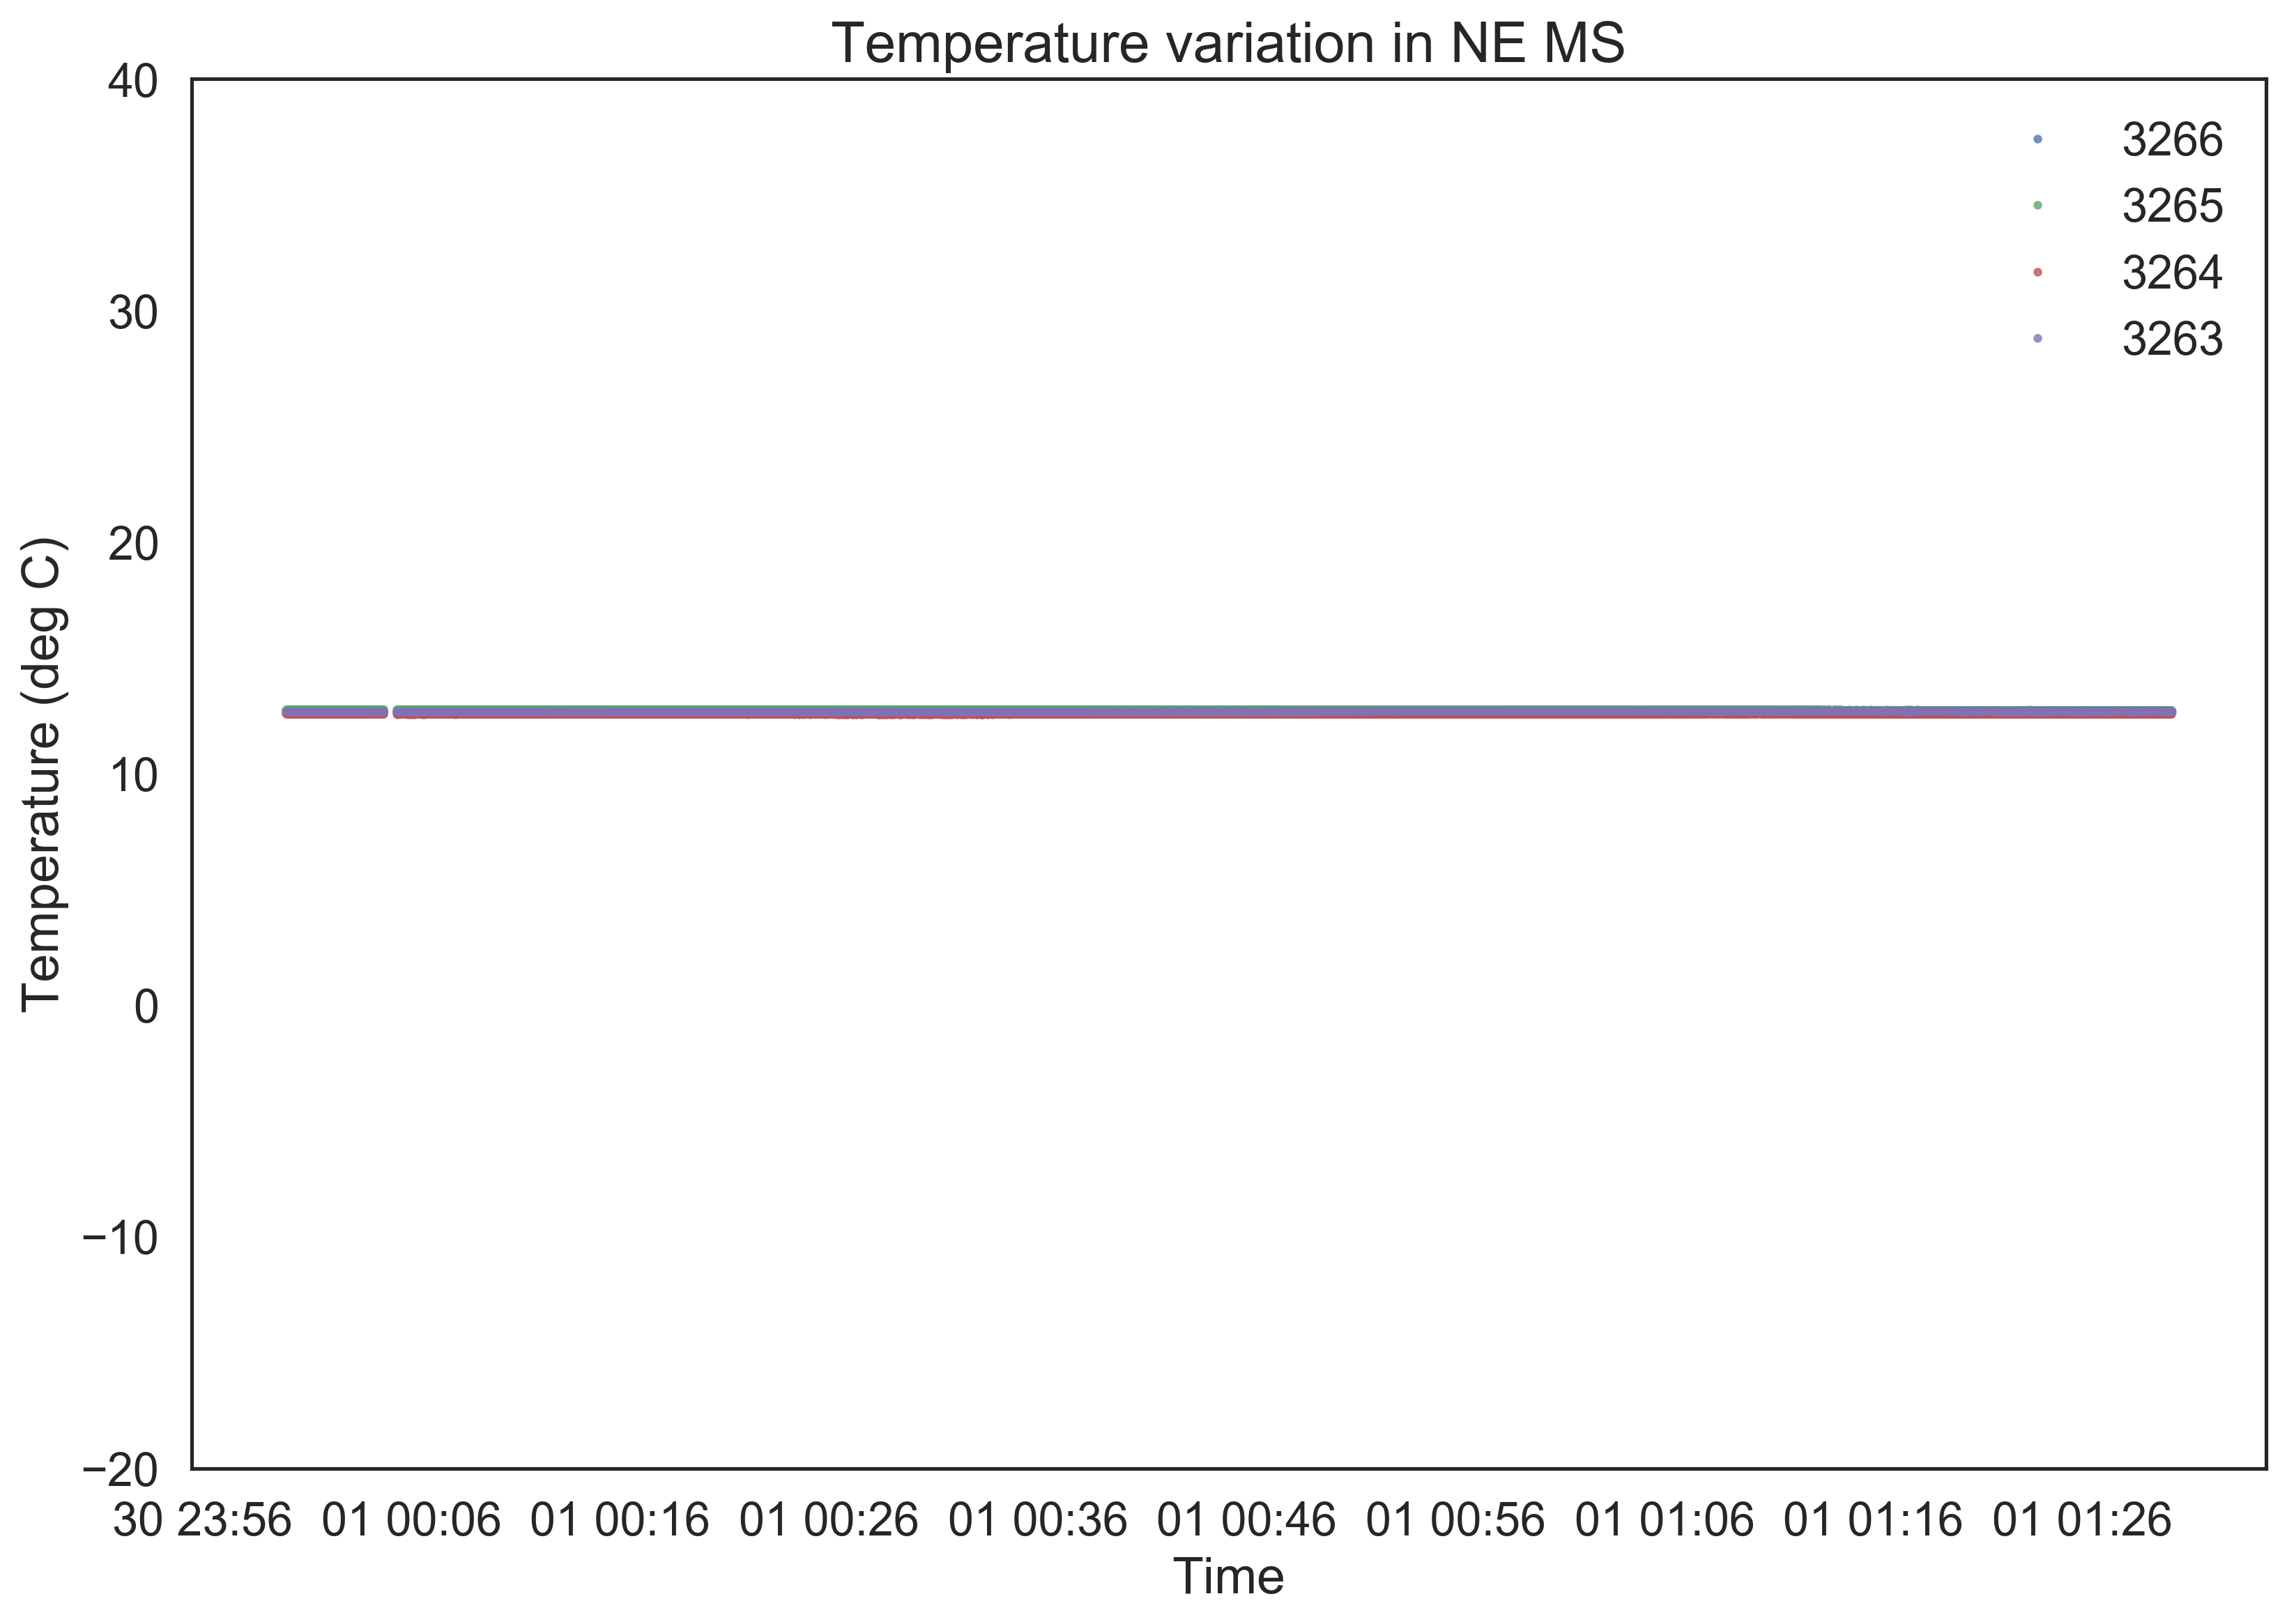

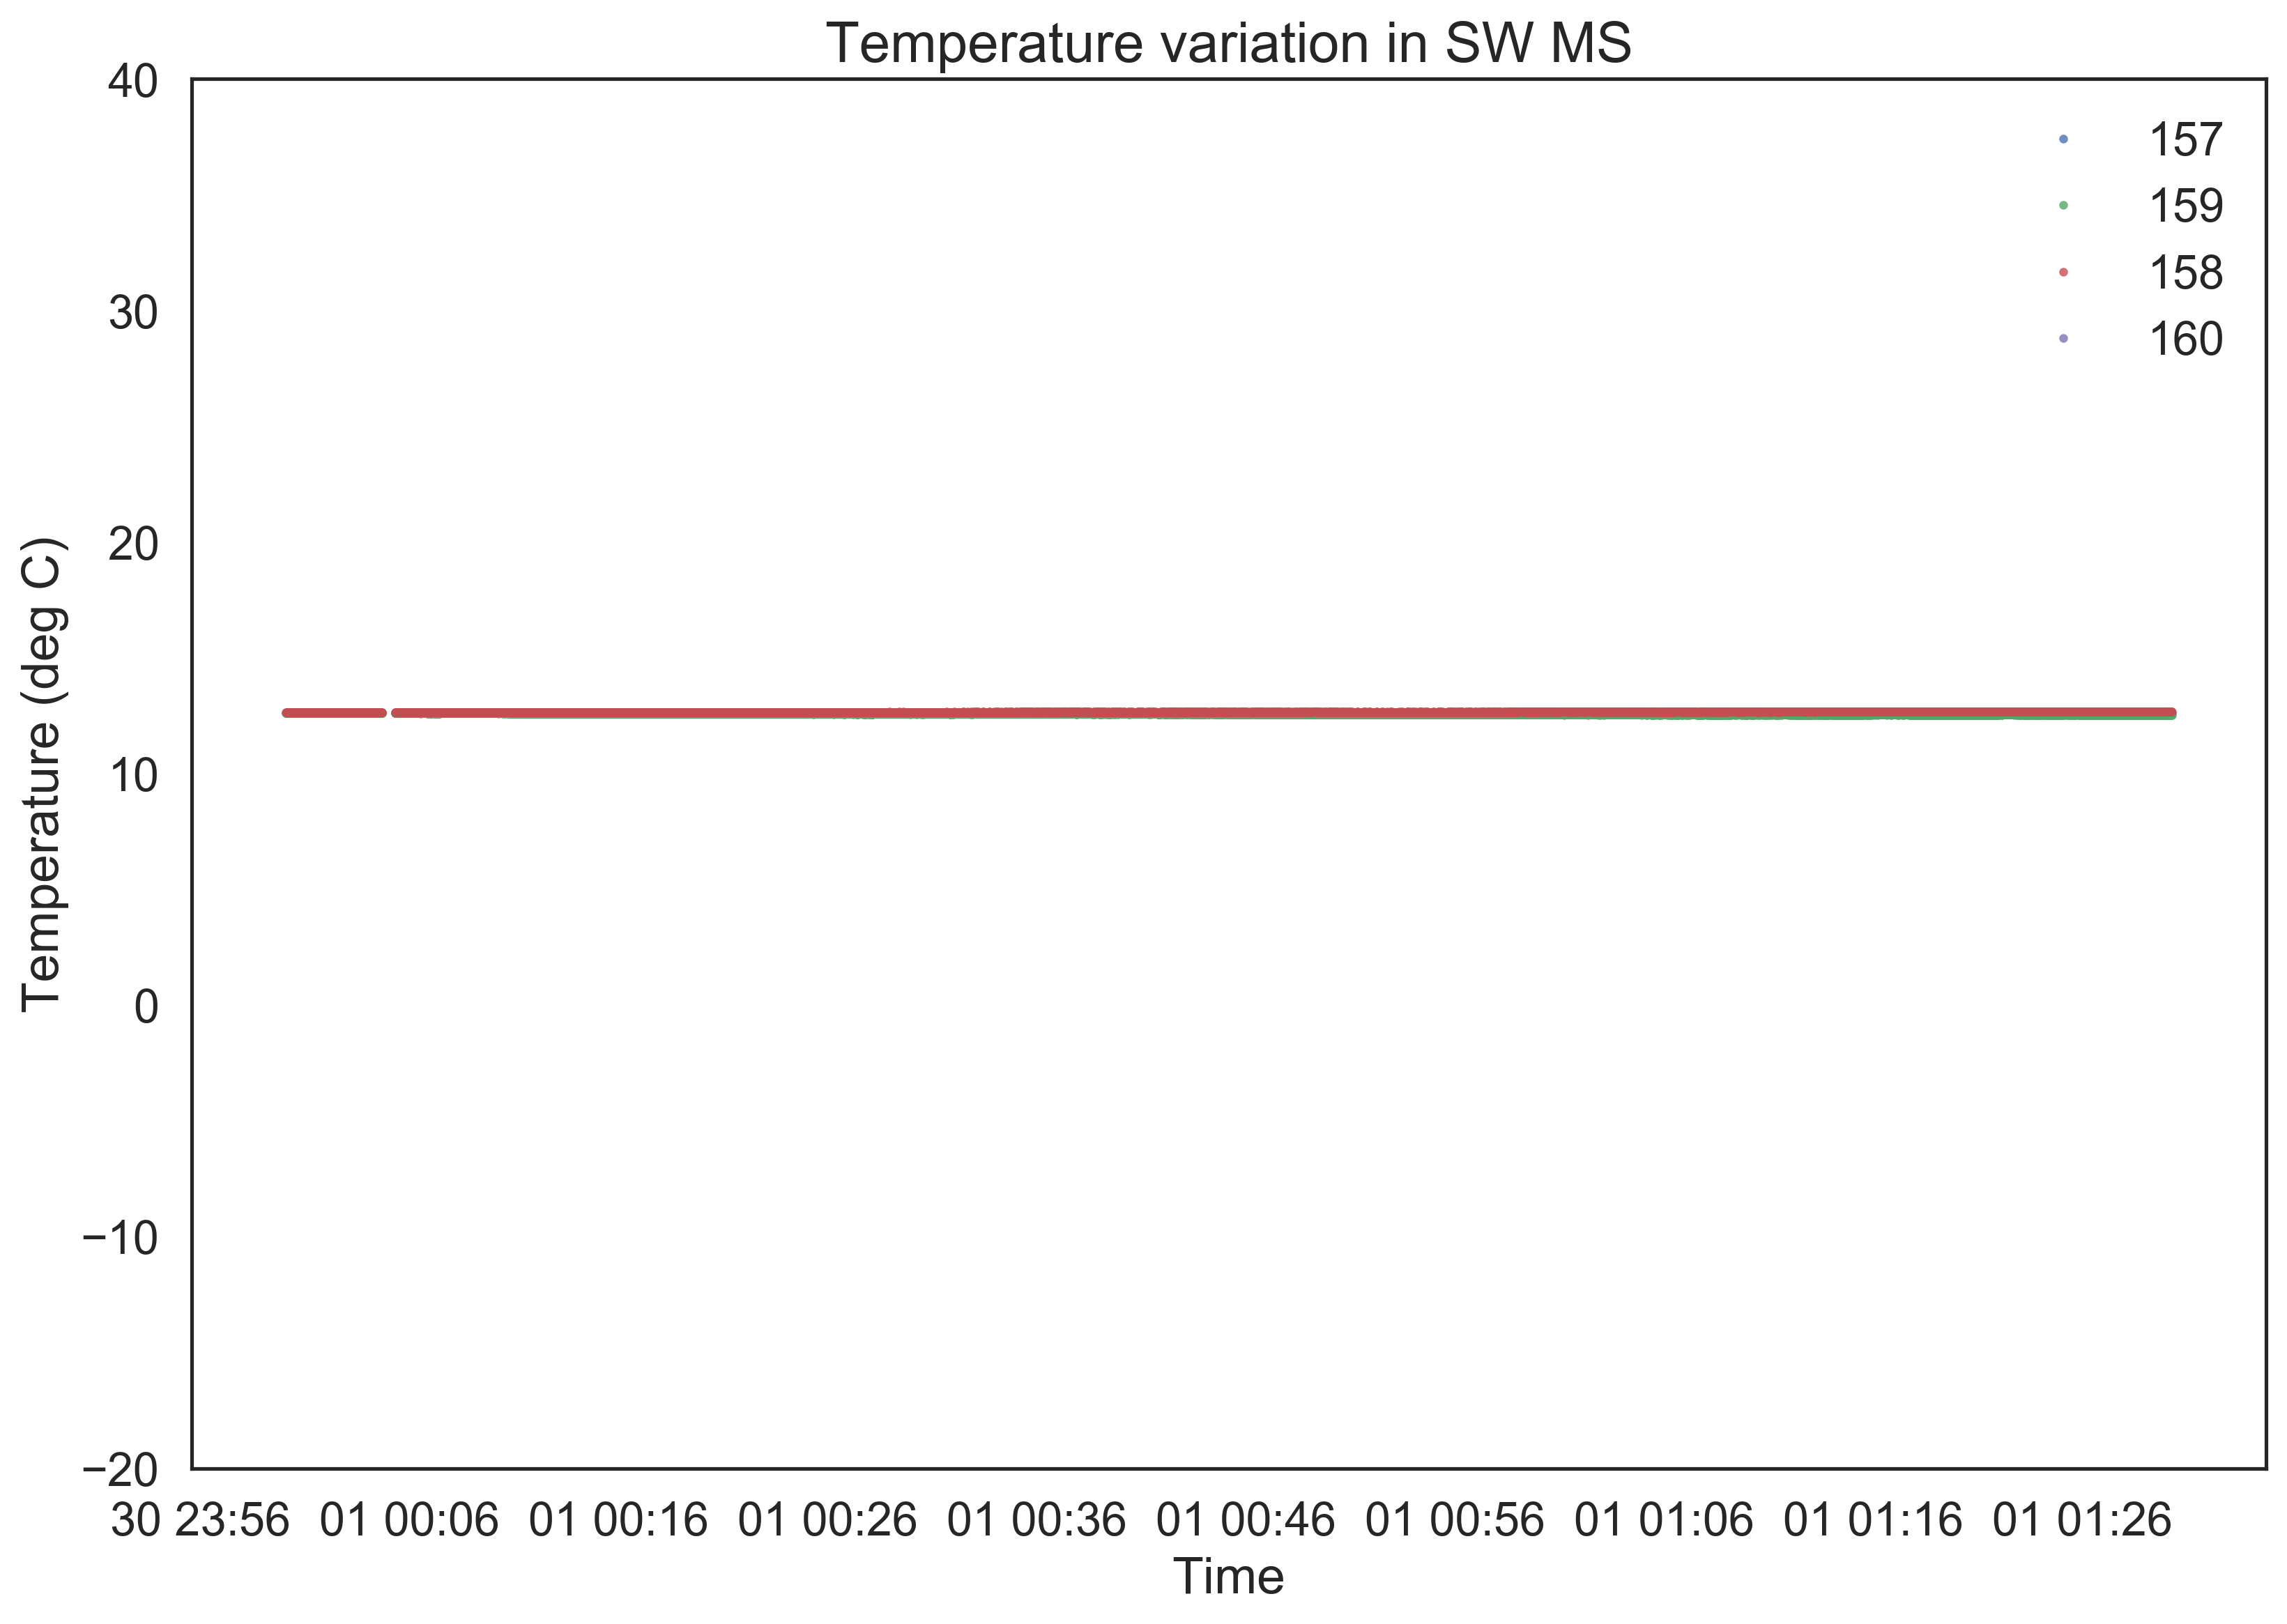

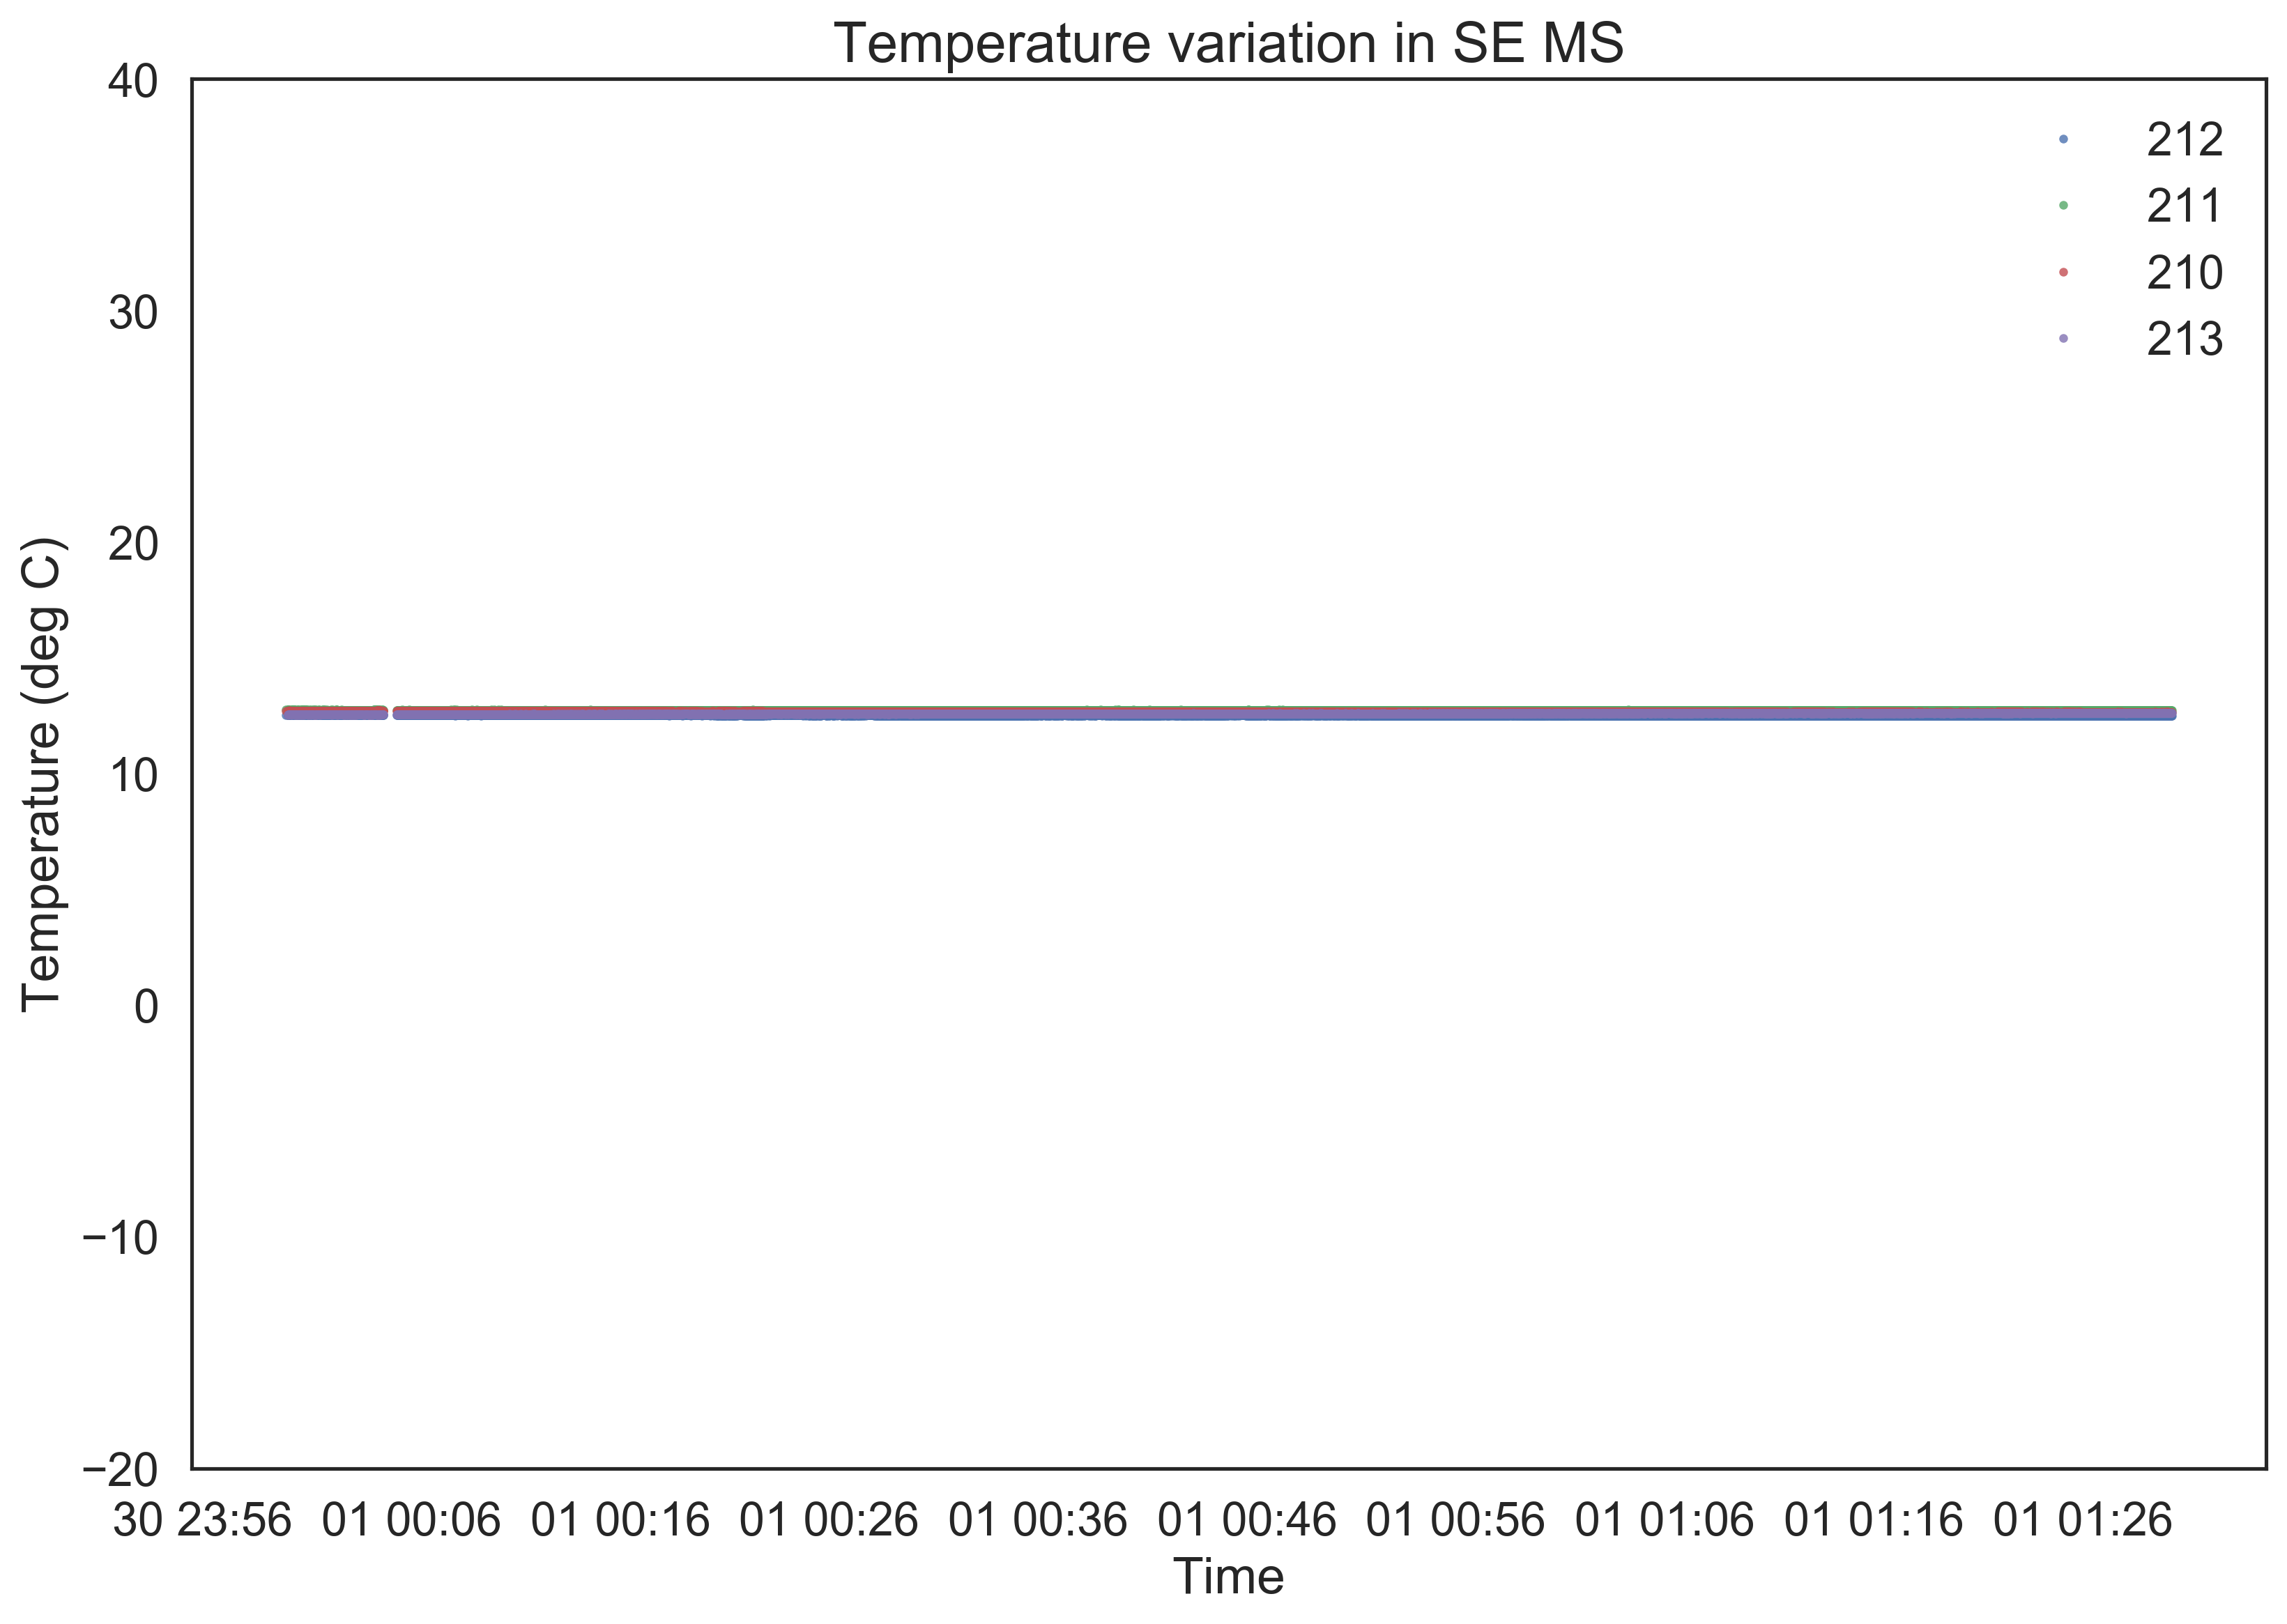

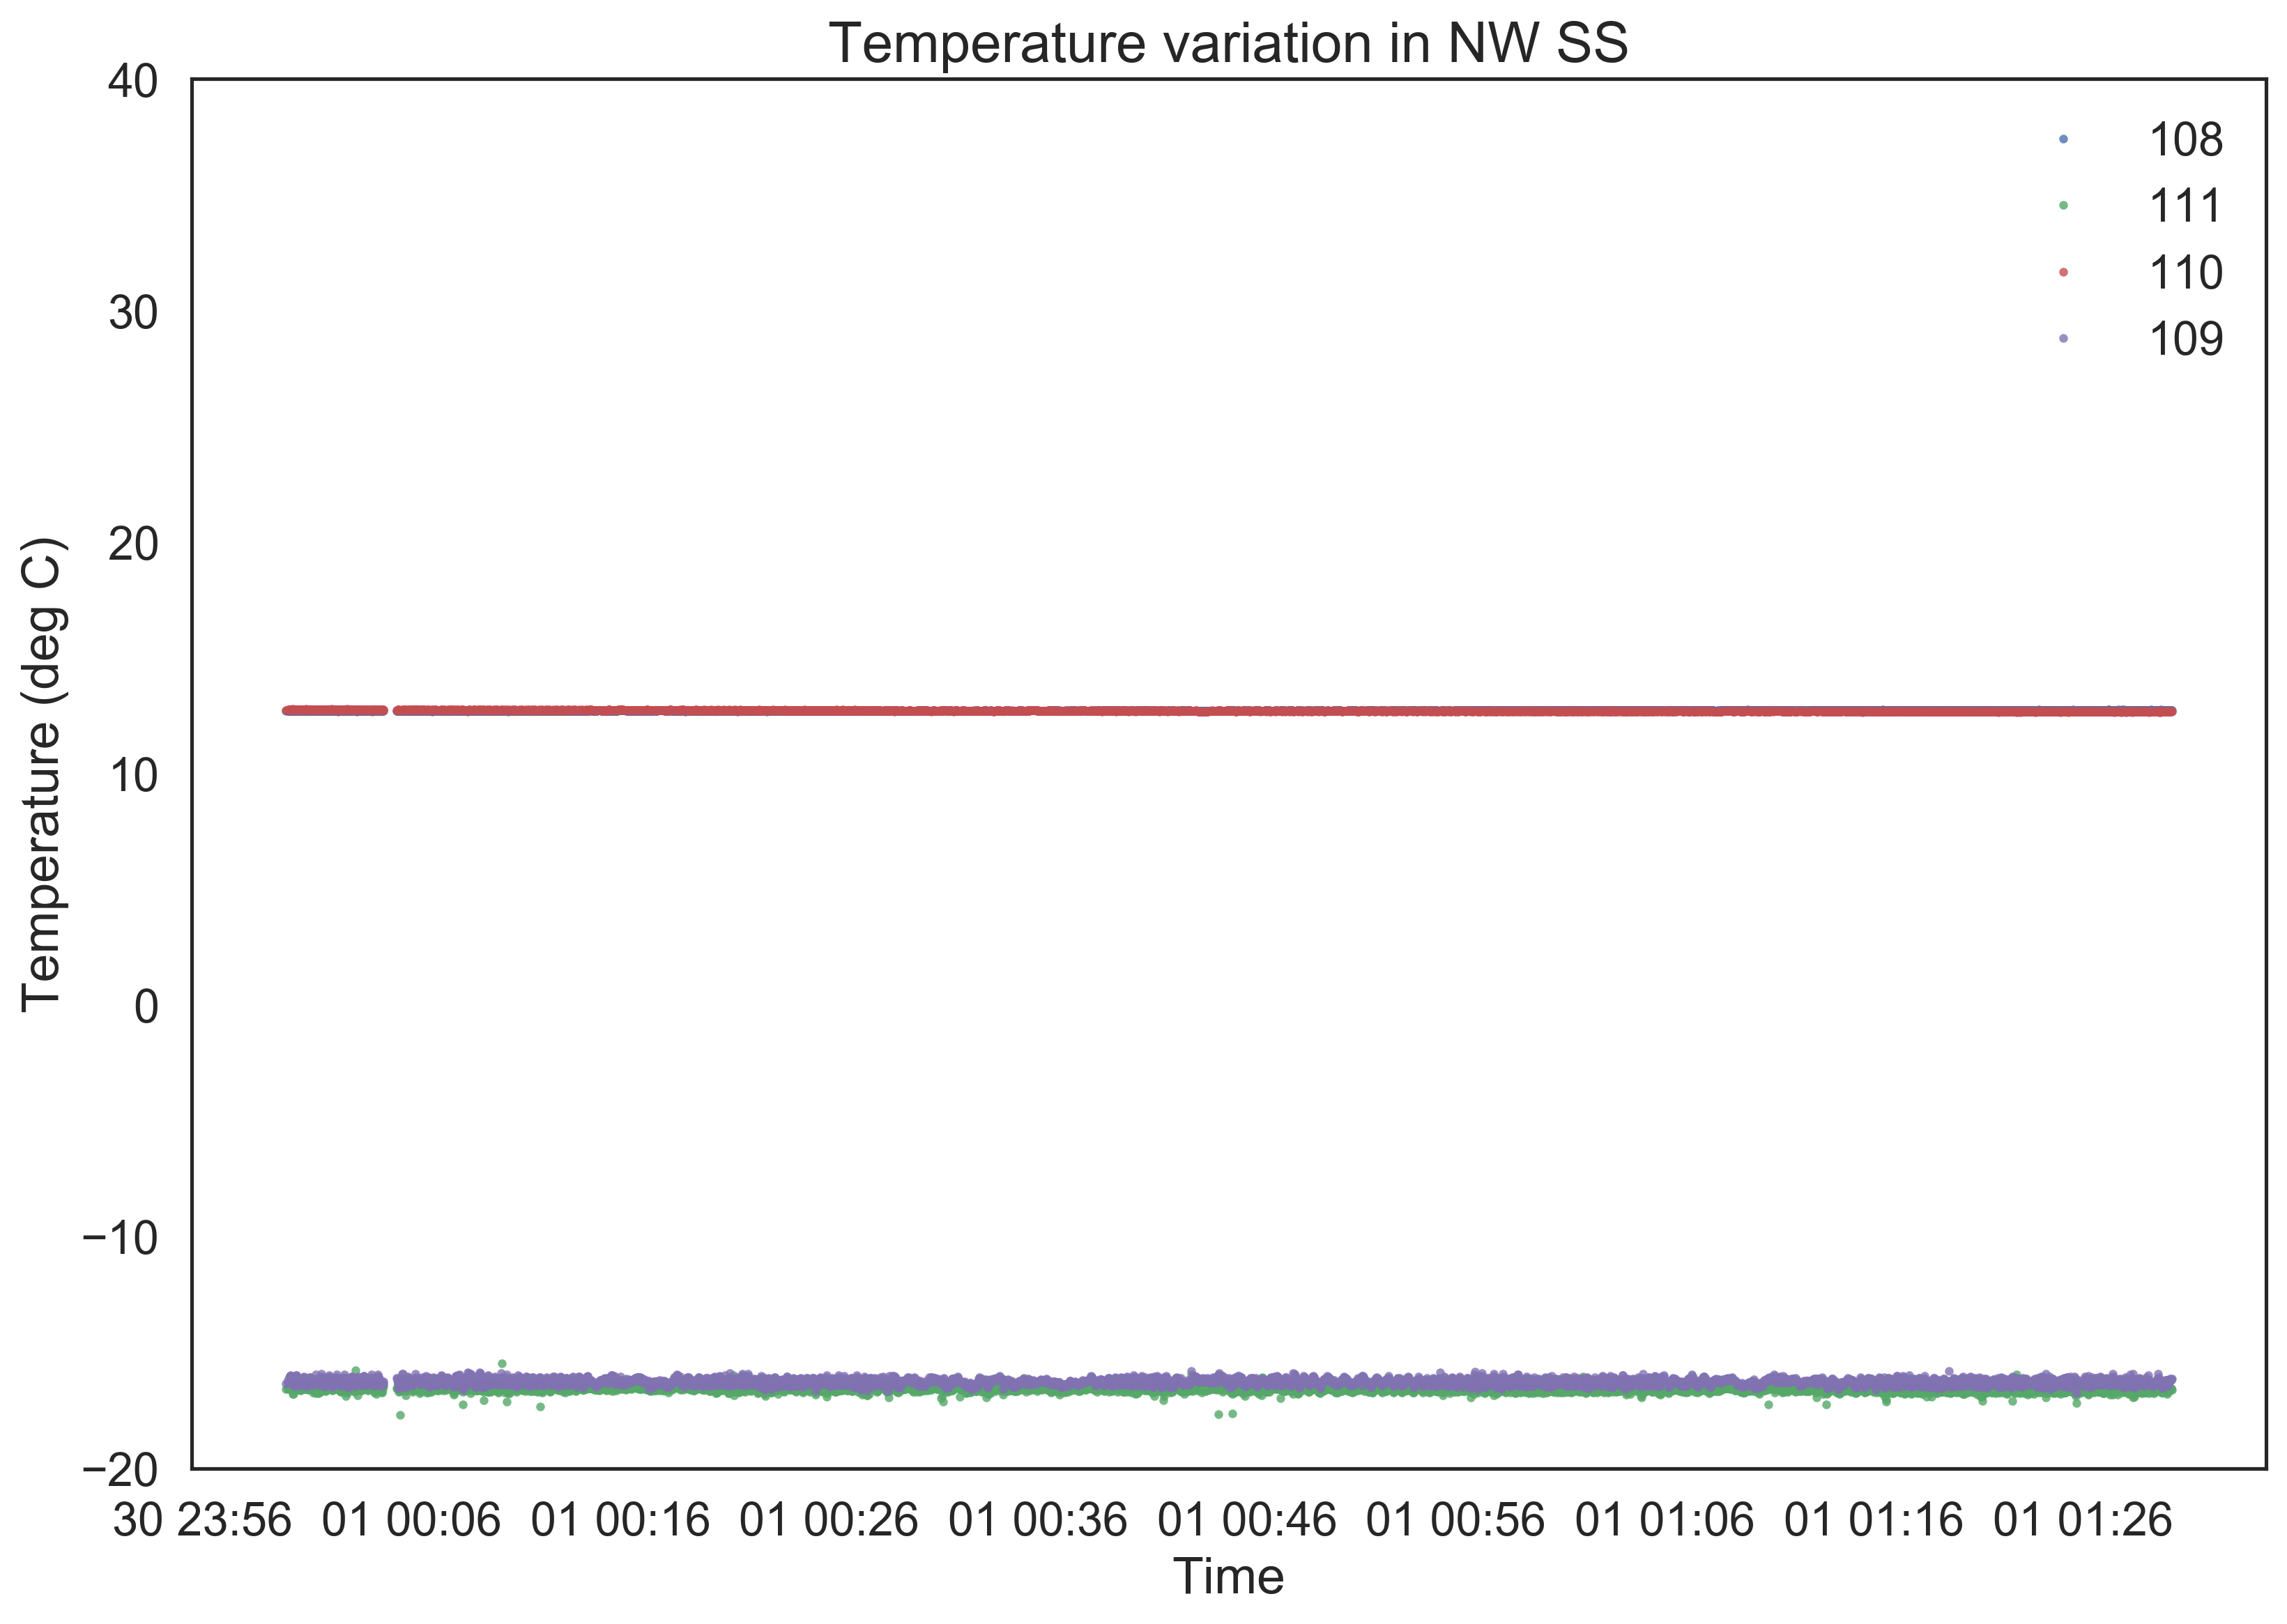

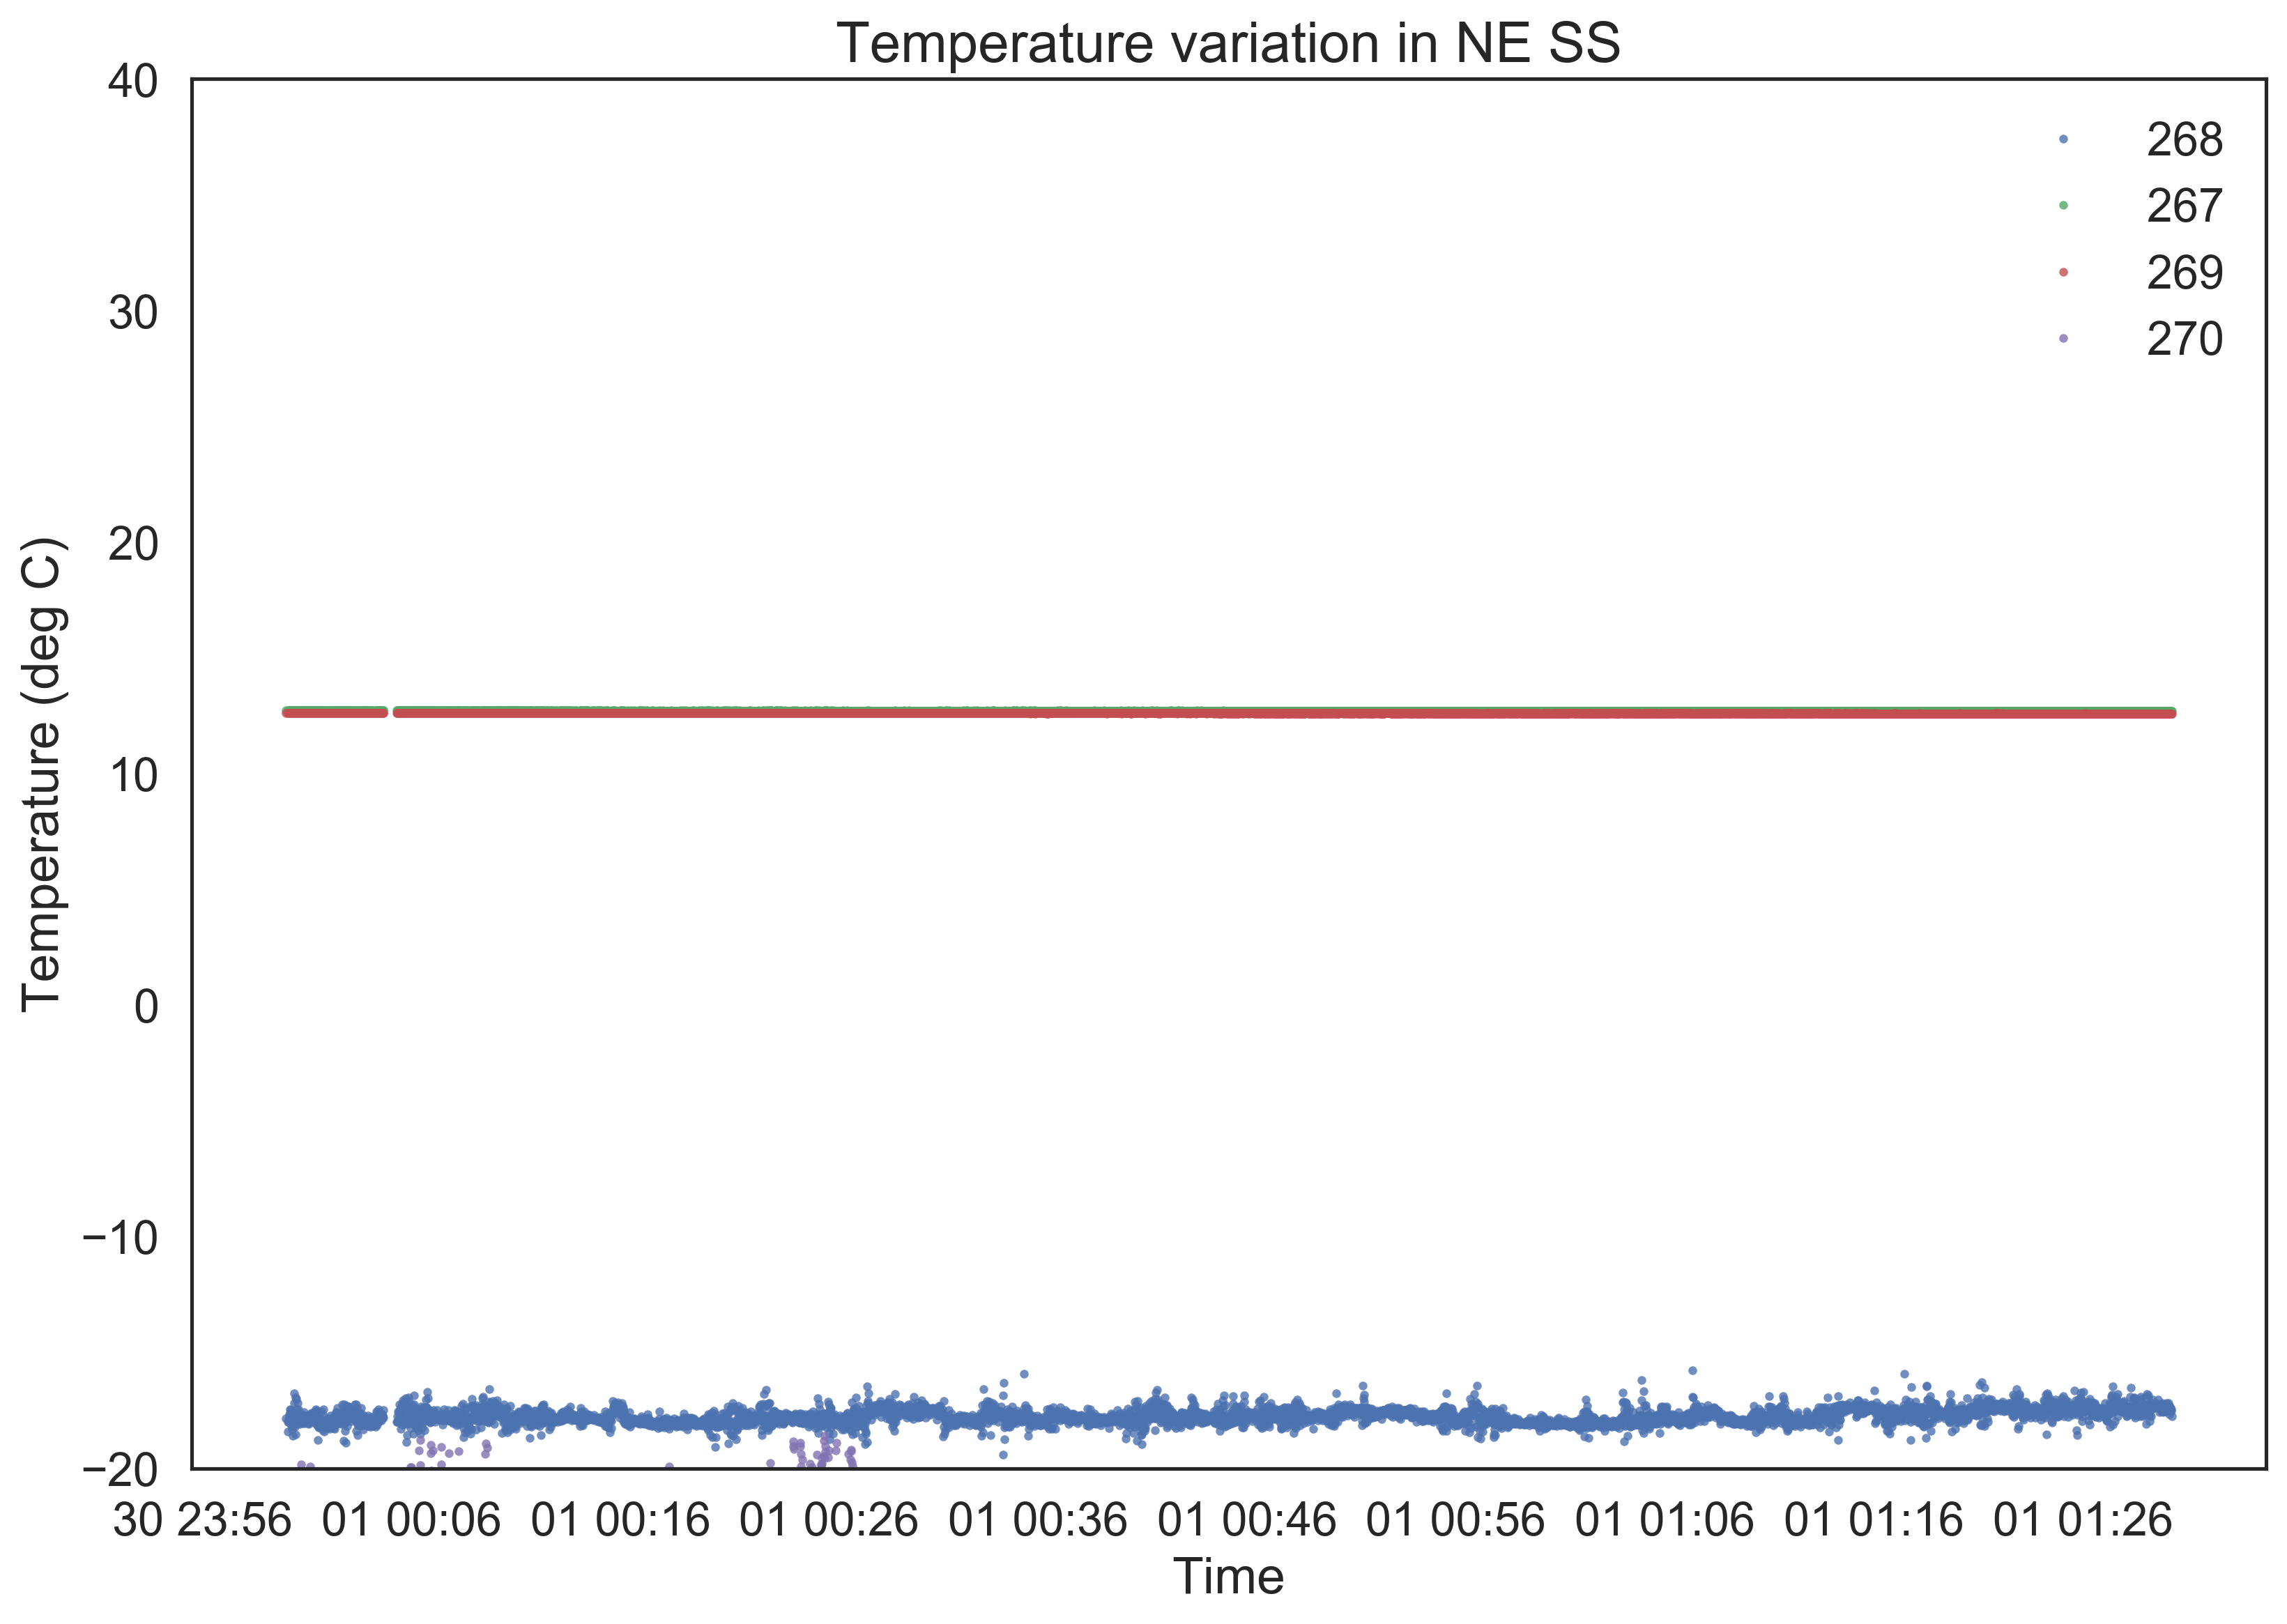

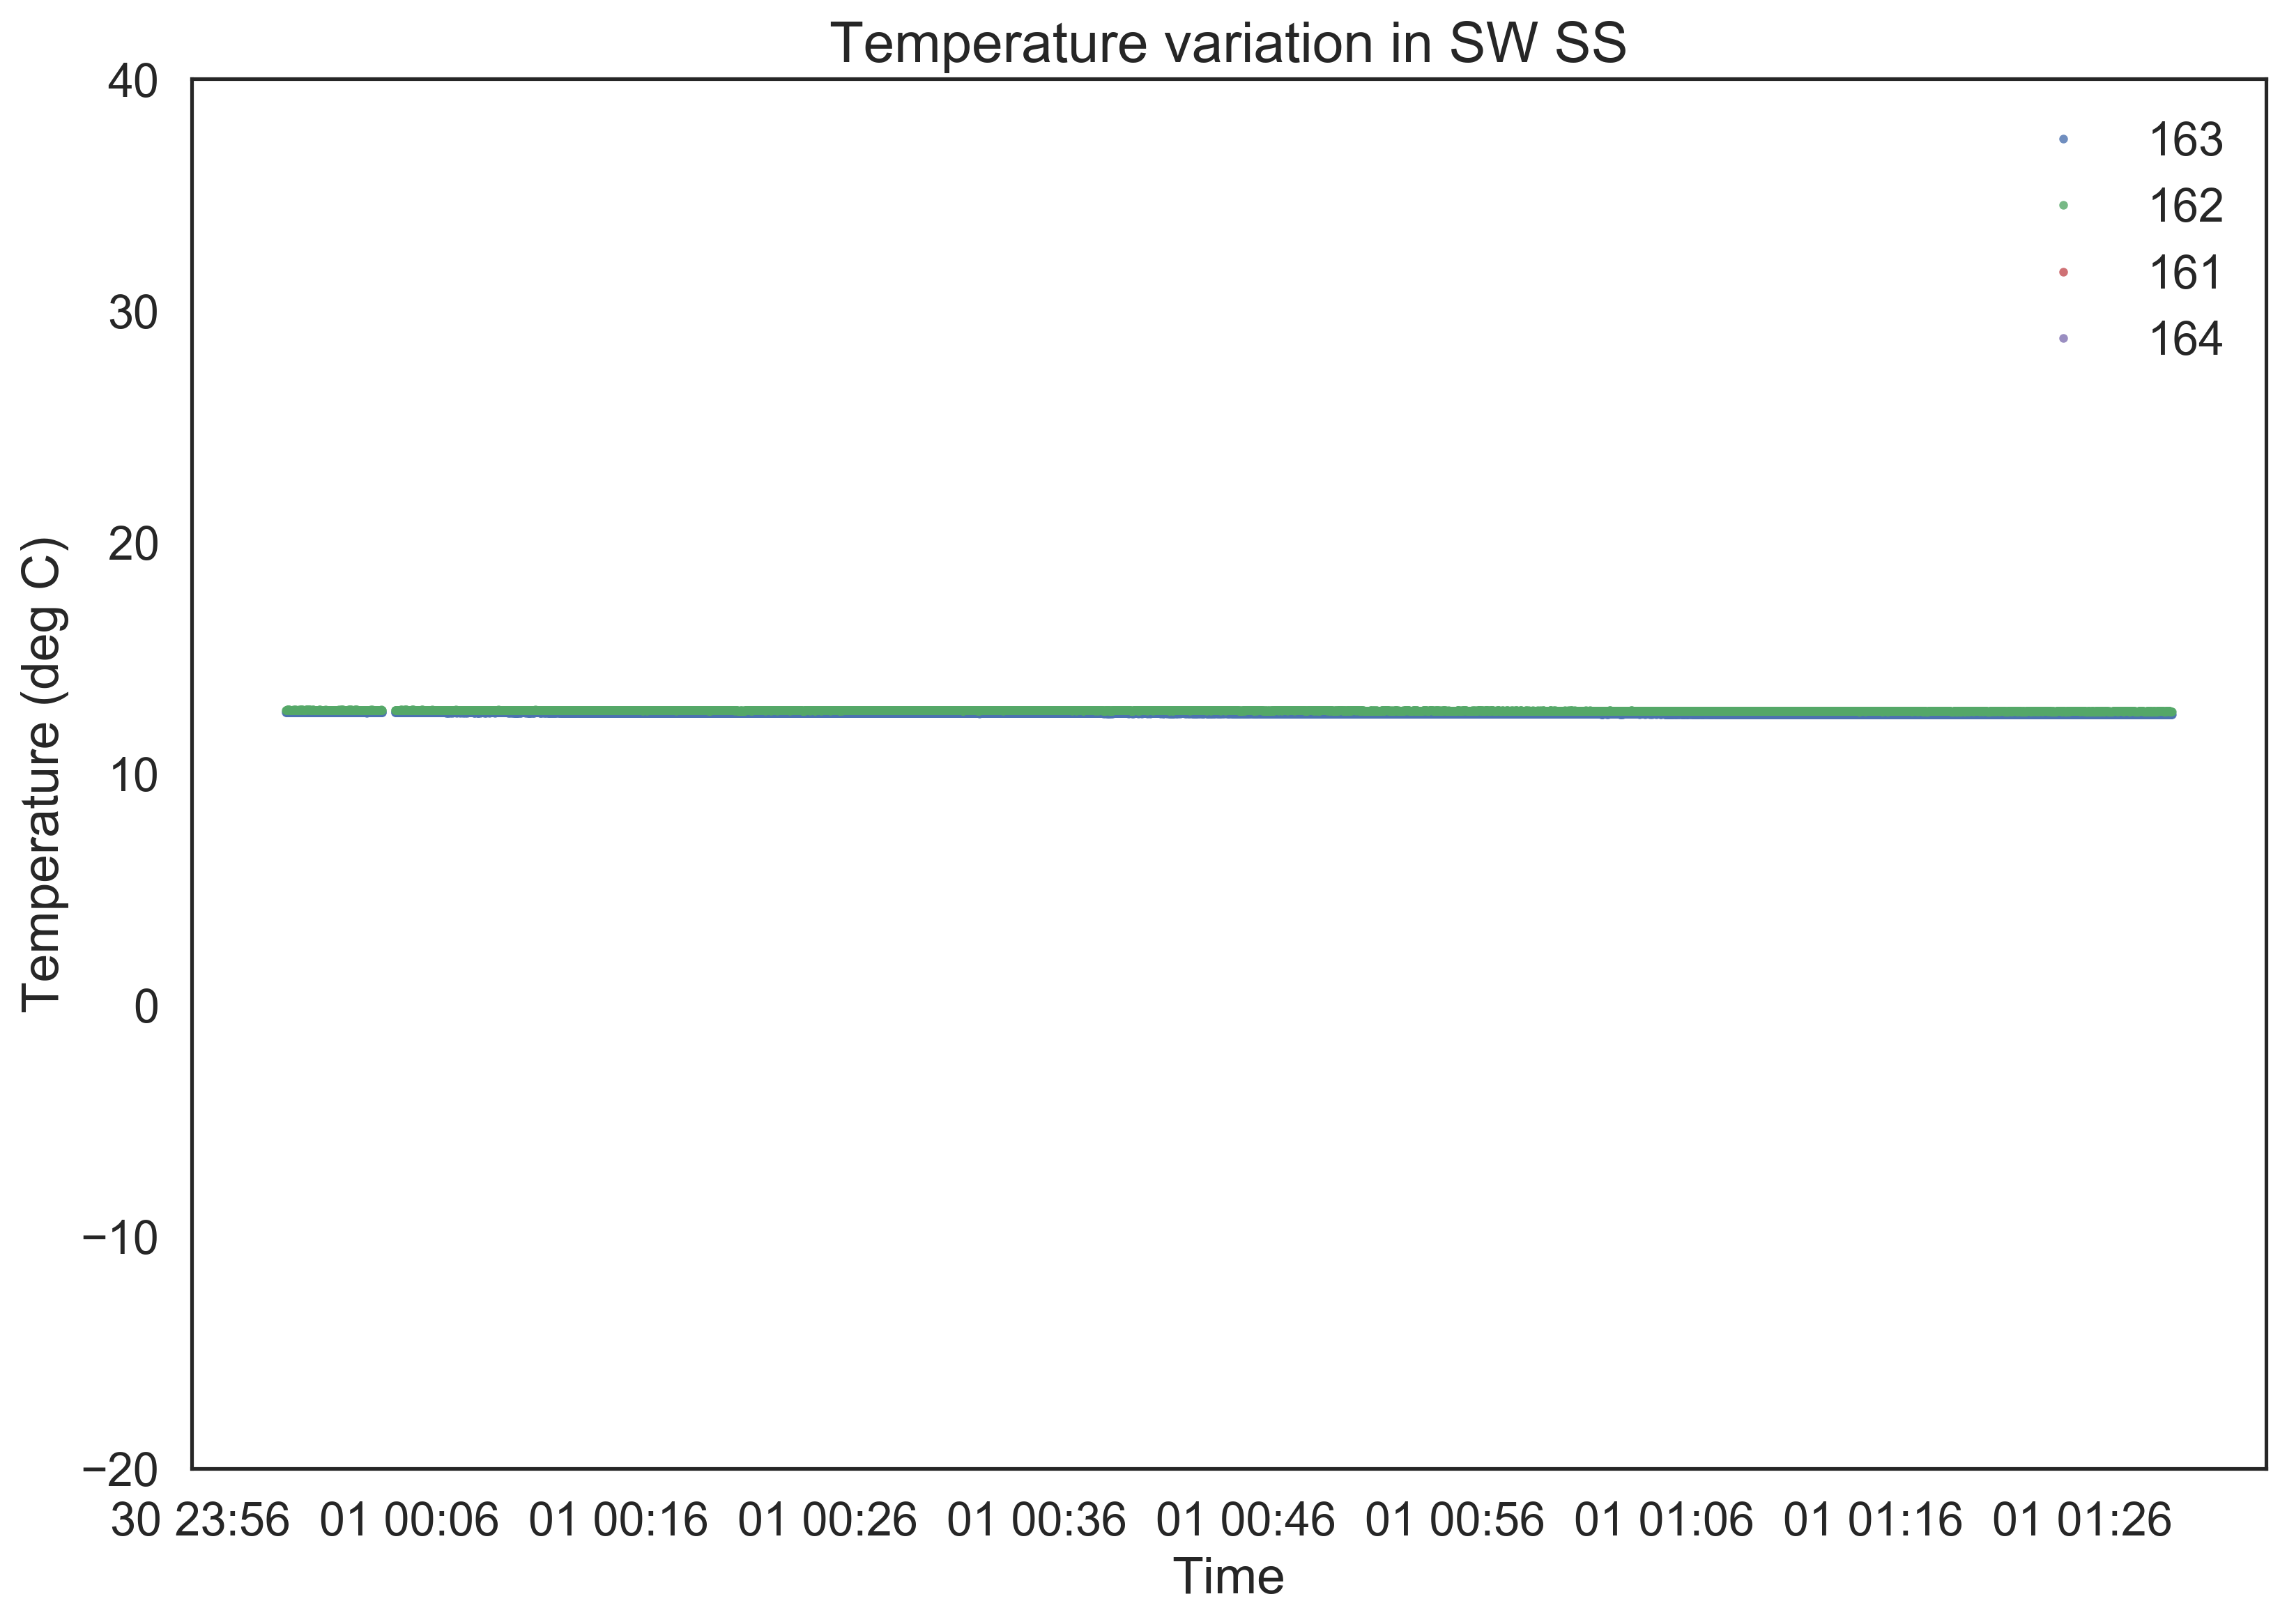

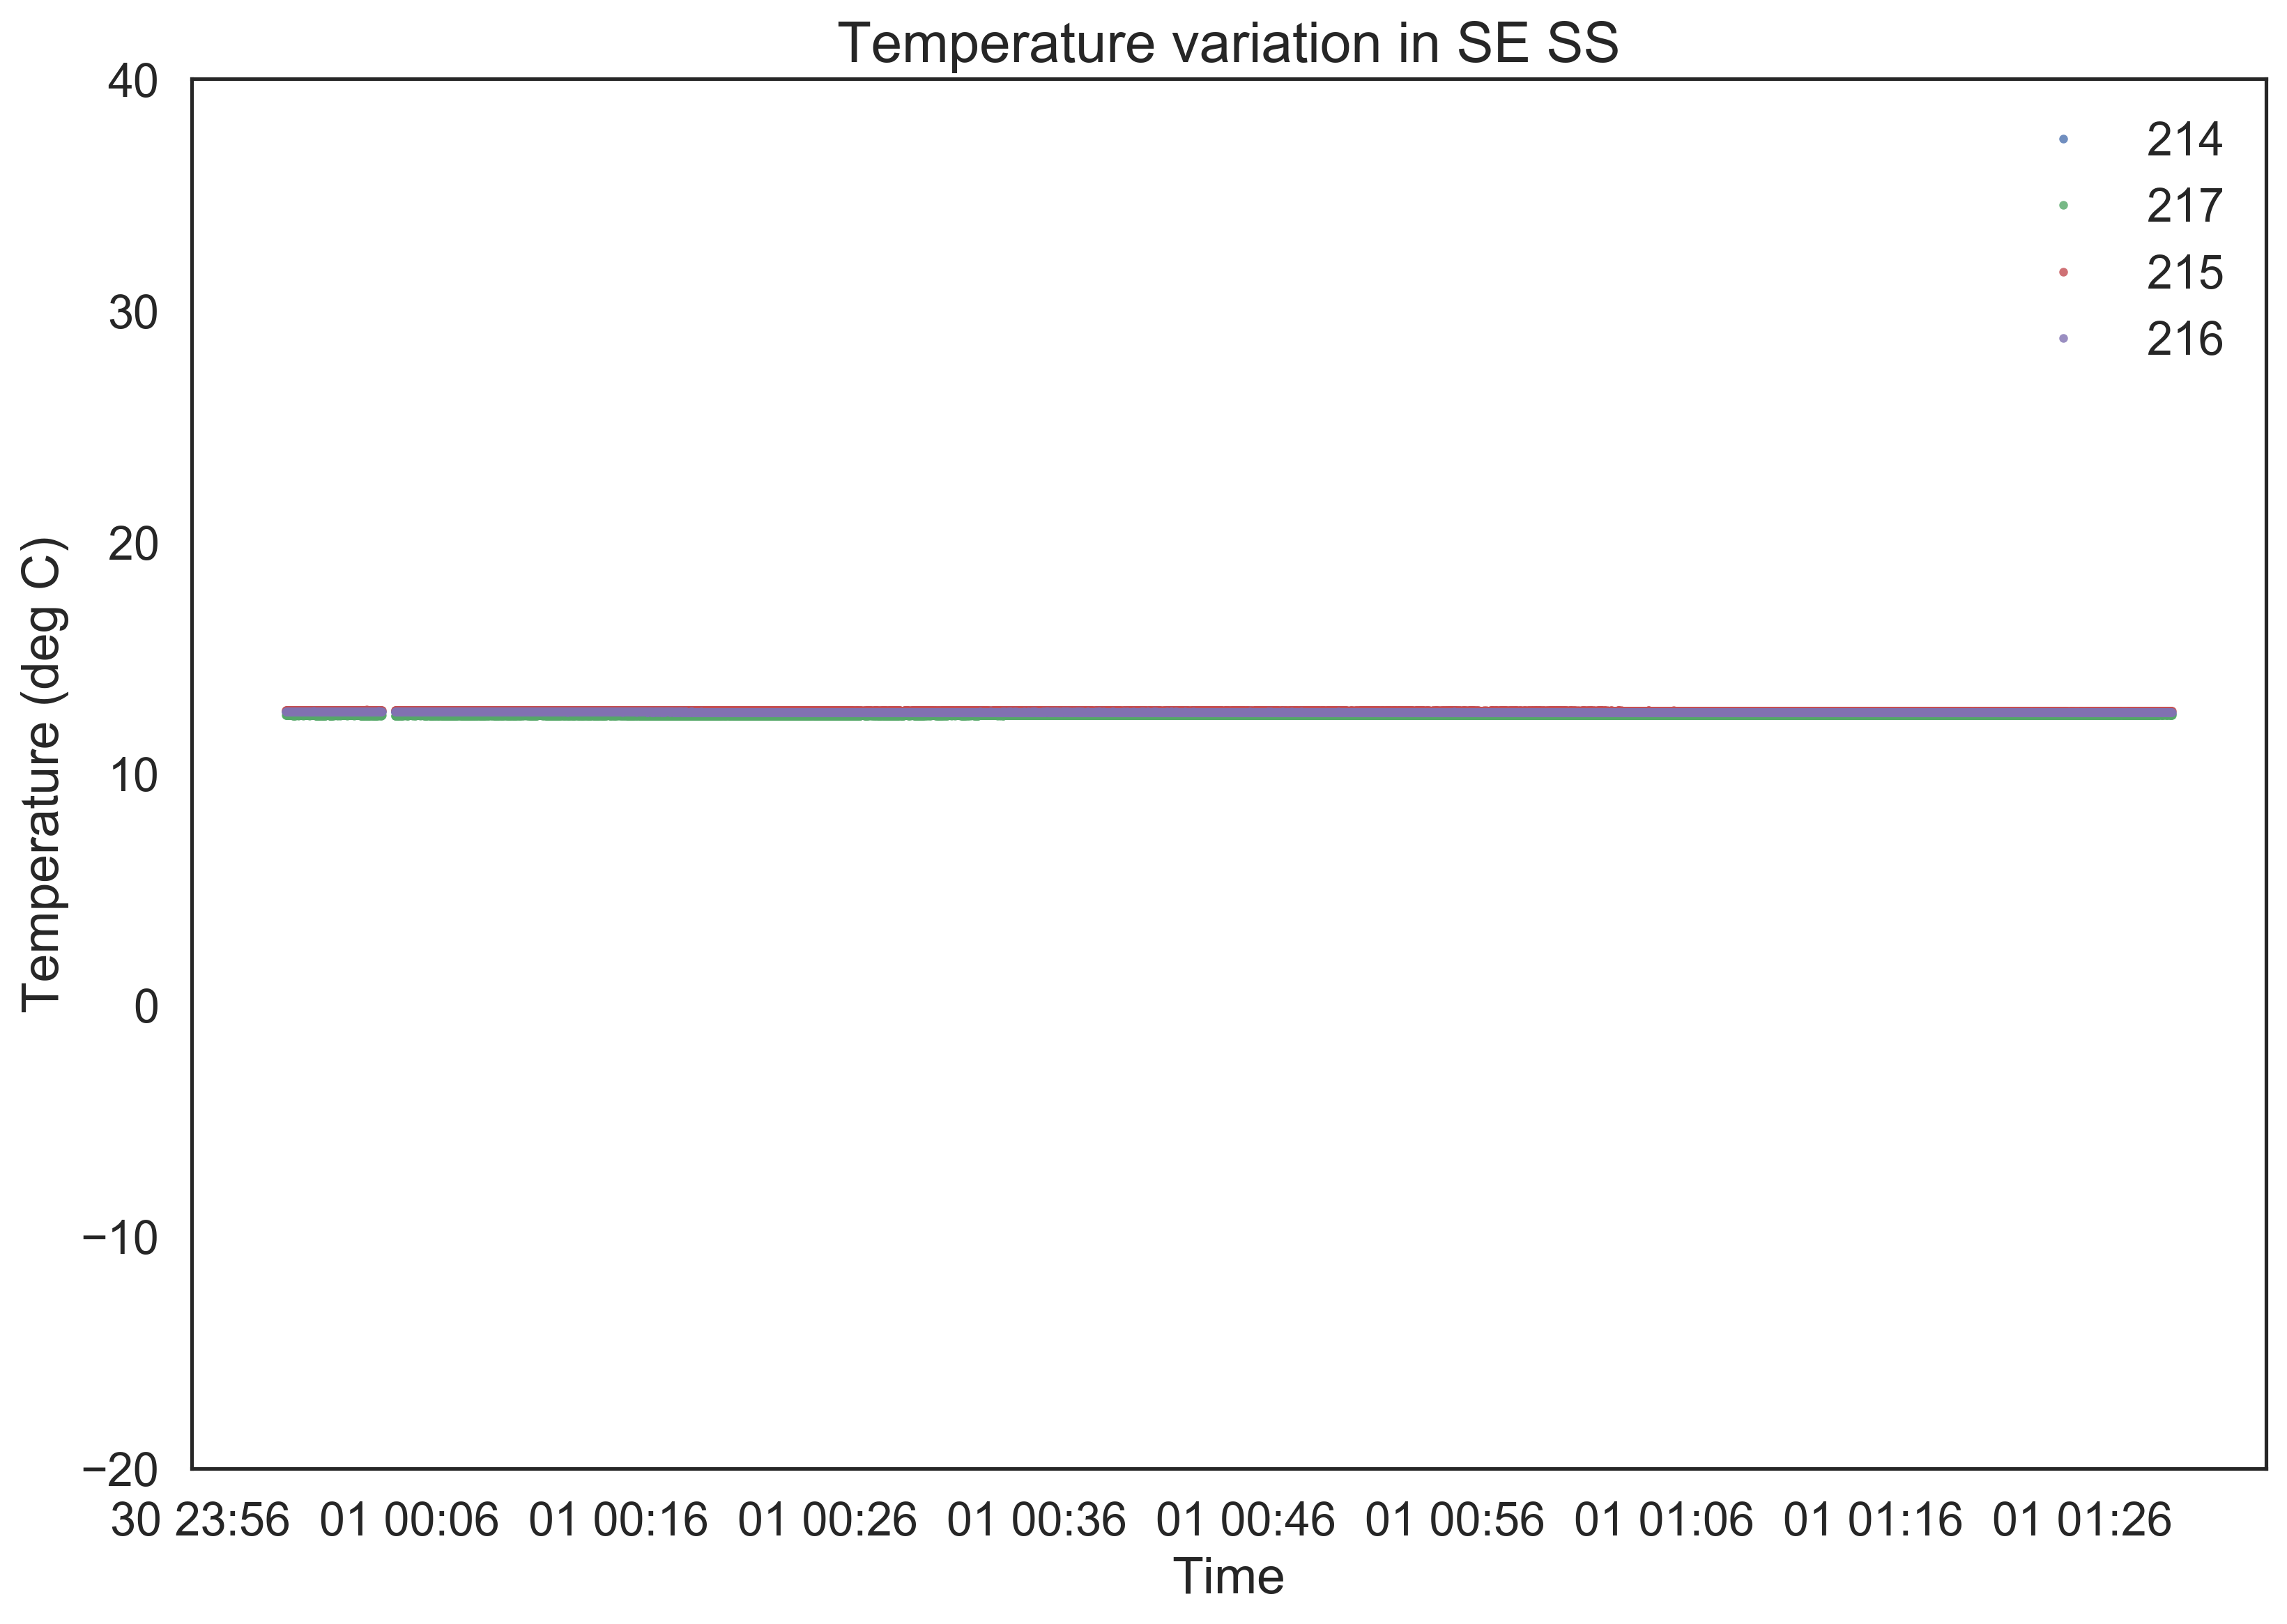

In [5]:
directions = ['NW', 'NE', 'SW', 'SE']
spans = ['MS', 'SS']

for span in spans:
    for direction in directions:
        df_tmp = (df[(df['loc_dir'] == direction)
                     & (df['loc_spn'] == span) 
                     & (df['remark'] != 'internal')])
        fig = plt.figure(dpi=300)
        ax = fig.add_subplot(111)
        
        for sensor in df_tmp.sensor_id.unique():
            x = df_tmp[df_tmp['sensor_id'] == sensor].timestamp
            y = df_tmp[df_tmp['sensor_id'] == sensor].value

            ax.plot_date(x, y, alpha=0.8, markersize=3, label=sensor)
            ax.legend()

        title = 'Temperature variation in ' + direction + ' ' + span
        plt.title(title)
        plt.xlabel('Time')
        plt.ylabel('Temperature (deg C)')
        plt.ylim(-20, 40)
#         fig.savefig('fig-' + title.replace(' ', '-') + '.png')

Some data requires cleaning:

* Extreme values
* Not sensible values (negatives)
* High volatility values (NE SS 270)

In [9]:
df_tmp = (df[(df['loc_dir'] == direction)
                     & (df['loc_spn'] == span) 
                     & (df['remark'] == 'internal')])
df_tmp.head()

,timestamp,sensor_id,loc_dir,loc_spn,value,remark
221,2017-07-01 00:00:05,218,SE,SS,23.57133,internal
418,2017-07-01 00:00:06,218,SE,SS,23.57435,internal
514,2017-07-01 00:00:07,218,SE,SS,23.57994,internal
741,2017-07-01 00:00:08,218,SE,SS,23.58310,internal
906,2017-07-01 00:00:09,218,SE,SS,23.56397,internal


In [5]:
# DONE

In [12]:
df2 = pd.read_hdf('data1-zdc.h5', 'table', where='sensor_type in tmp', mode='r', columns=['timestamp', 'sensor_id', 'loc_dir', 'loc_spn', 'value', 'remark'])

In [13]:
len(df)

193538

In [14]:
all_data = pd.DataFrame()
len(df.append(df2))

387076

In [17]:
all_data.append(df).append(df2)

,timestamp,sensor_id,loc_dir,loc_spn,value,remark
1,2017-07-01 00:00:00,212,SE,MS,12.53911,NaN
3,2017-07-01 00:00:00,211,SE,MS,12.75999,NaN
5,2017-07-01 00:00:00,210,SE,MS,12.72045,NaN
28,2017-07-01 00:00:00,104,NW,MS,12.84082,NaN
38,2017-07-01 00:00:00,112,NW,SS,32.15879,internal
41,2017-07-01 00:00:00,108,NW,SS,12.72133,NaN
44,2017-07-01 00:00:00,111,NW,SS,-16.57739,NaN
45,2017-07-01 00:00:00,110,NW,SS,12.74685,NaN
47,2017-07-01 00:00:00,109,NW,SS,-16.33587,NaN
50,2017-07-01 00:00:00,107,NW,MS,12.87782,NaN


In [27]:
all_data = pd.DataFrame()

In [20]:
all_data.append(df)

In [22]:
all_data.append(df2)

In [30]:
all_data = pd.concat([all_data, df])

In [31]:
len(all_data)

193538

In [32]:
all_data = pd.concat([all_data, df2])

In [33]:
len(all_data)

387076